# Heart Attack Predicting Projcet

### Problem definition: To predict whether the patients does come heart attack or not

#### Features:

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n

## Data Exploration:

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from collections import Counter
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import randint
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("data.csv")

## Describe() Definition and Usage

* The describe() method returns description of the data in the DataFrame.
* If the DataFrame contains numerical data, the description contains these information for each column:

*   count - The number of not-empty values.
*   mean - The average (mean) value.
*   std - The standard deviation.
*   min - the minimum value.
*   25% - The 25% percentile*.
*   50% - The 50% percentile*.
*   75% - The 75% percentile*.
*   max - the maximum value.

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


# Head() Function Definition

* The head() function is used to get the first n rows. 
* This function returns the first n rows for the object based on position

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


# Tail() Function Definition

* The tail() function is used to get the last n rows. 
* This function returns the last n rows for the object based on position

In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


# Shape 

* It returns the no.of rows and columns 

In [8]:
df.shape

(297, 14)

# info() Function

* The info() method prints information about the DataFrame. 
* The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


# isnull() Function

* isnull(). sum() returns the number of missing values in the dataset.

In [13]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [14]:
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

In [15]:
X = df.drop(columns='condition', axis=1)
Y = df['condition']

In [16]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  
0        1   1     0  
1        0   2     0  
2        2   0    

In [17]:
print(Y)

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(297, 13) (237, 13) (60, 13)


#  LogisticRegression()

* Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning     technique. 
* It is used for predicting the categorical dependent variable using a given set of independent variables. 
* Logistic regression predicts the output of a categorical dependent variable.

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train.values, Y_train.values)

LogisticRegression()

In [25]:
X_train_prediction = model.predict(X_train.values)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train.values)
X_test_prediction = model.predict(X_test.values)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test.values)

In [27]:
print('Accuracy on Training data : ', training_data_accuracy)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.8565400843881856
Accuracy on Test data :  0.9


In [29]:
input_data = (44,1,1,120,160,0,2,160,0,0.8,0,2,0)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


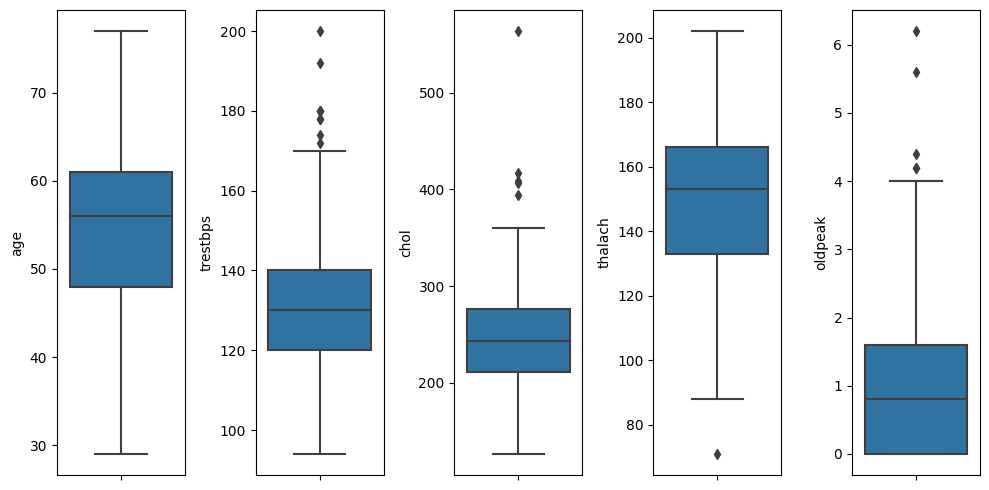

In [31]:
col_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=df[col_num[i]])
    plt.tight_layout()

In [33]:
for i in col_num:
    Q1 = df[i].quantile(0.25) 
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1 
    LowerBound = Q1 - (1.5 * IQR) 
    UpperBound = Q3 + (1.5 * IQR) 
    
    df = df[(df[i] >= LowerBound)&(df[i] <= UpperBound)]

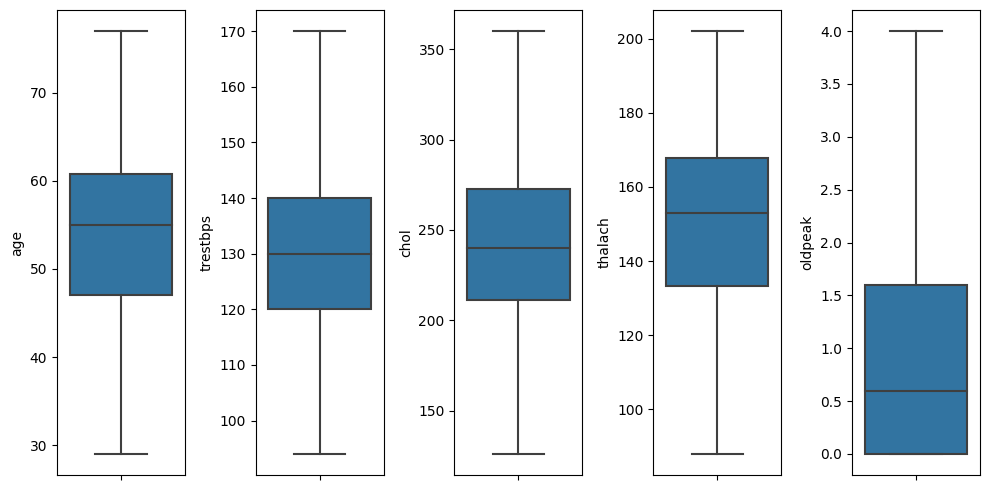

In [35]:
col_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = df[col_num[i]])
    plt.tight_layout()

In [36]:
df[col_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,278.0,54.172662,9.136690,29.0,47.00,55.0,60.75,77.0
trestbps,278.0,129.949640,15.598215,94.0,120.00,130.0,140.00,170.0
chol,278.0,243.147482,44.900972,126.0,211.00,240.0,272.50,360.0
thalach,278.0,150.000000,22.728185,88.0,133.25,153.0,167.75,202.0
oldpeak,278.0,0.963669,1.030585,0.0,0.00,0.6,1.60,4.0


In [37]:
count = ['sex', 'cp', 'fbs', 'restecg','exang','slope', 'ca', 'thal', 'condition']

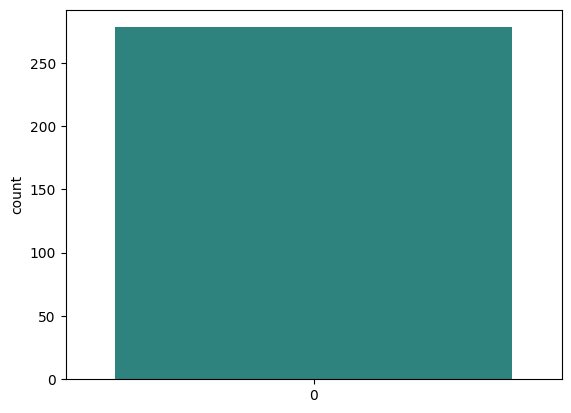

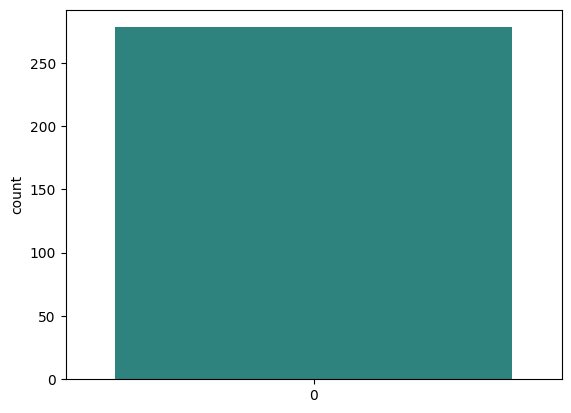

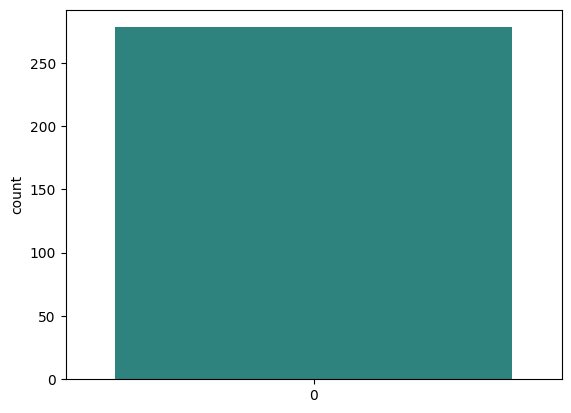

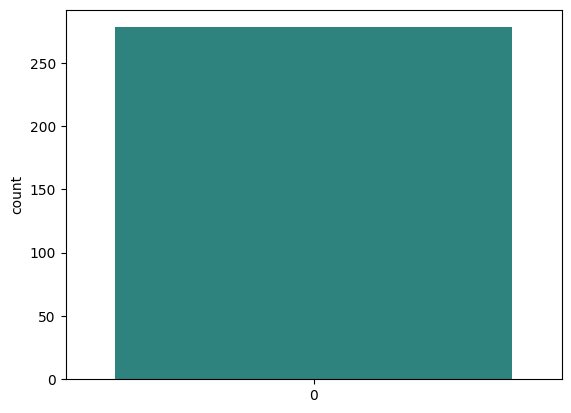

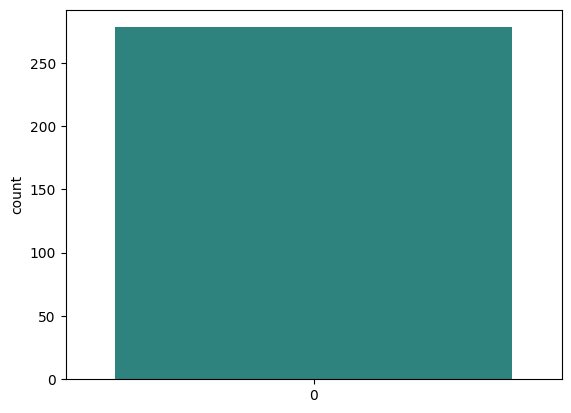

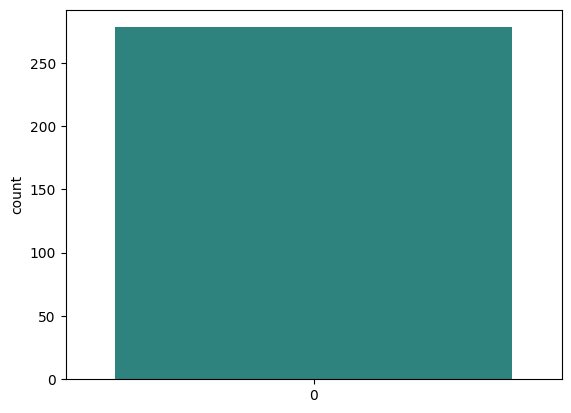

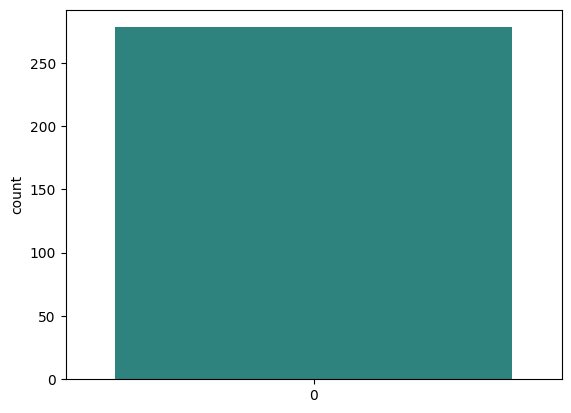

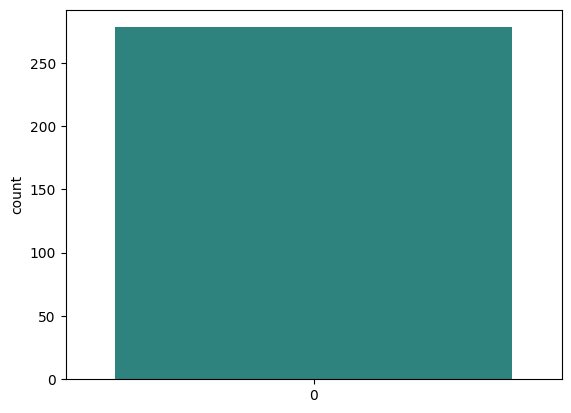

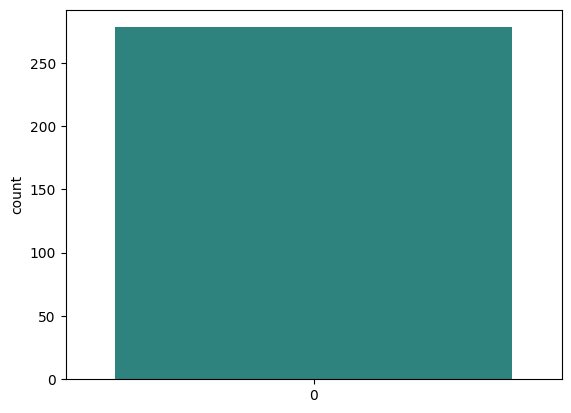

In [38]:
for i in count:
    sns.countplot(df[i], palette = 'viridis')
    plt.show()

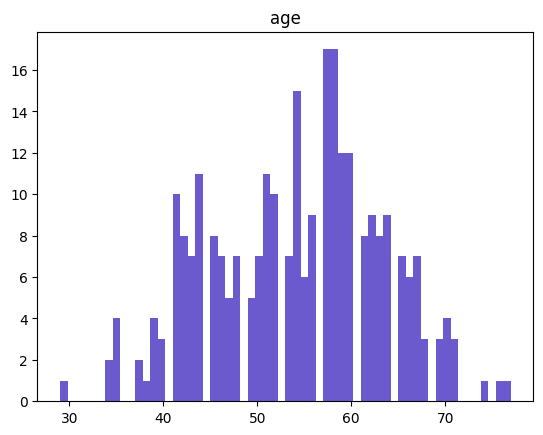

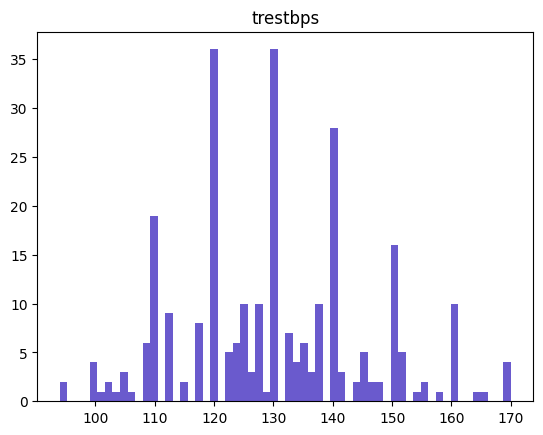

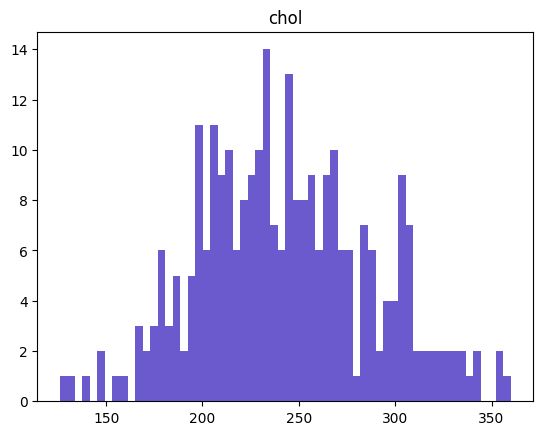

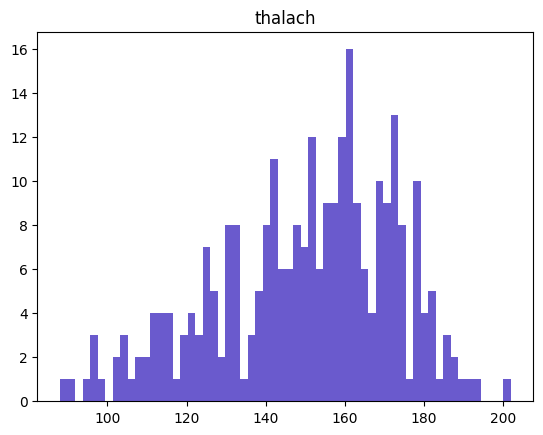

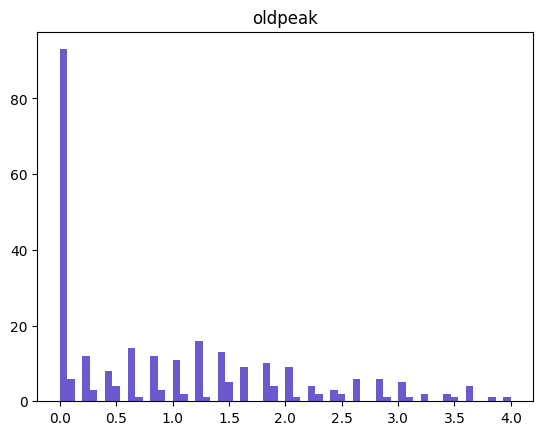

In [39]:
i = ['age', 'trestbps', 'chol','thalach','oldpeak']
for j in i:
    plt.hist(df[j],bins = 60, color = 'slateblue')
    plt.title(j)
    plt.show()

Pearson Correlation,


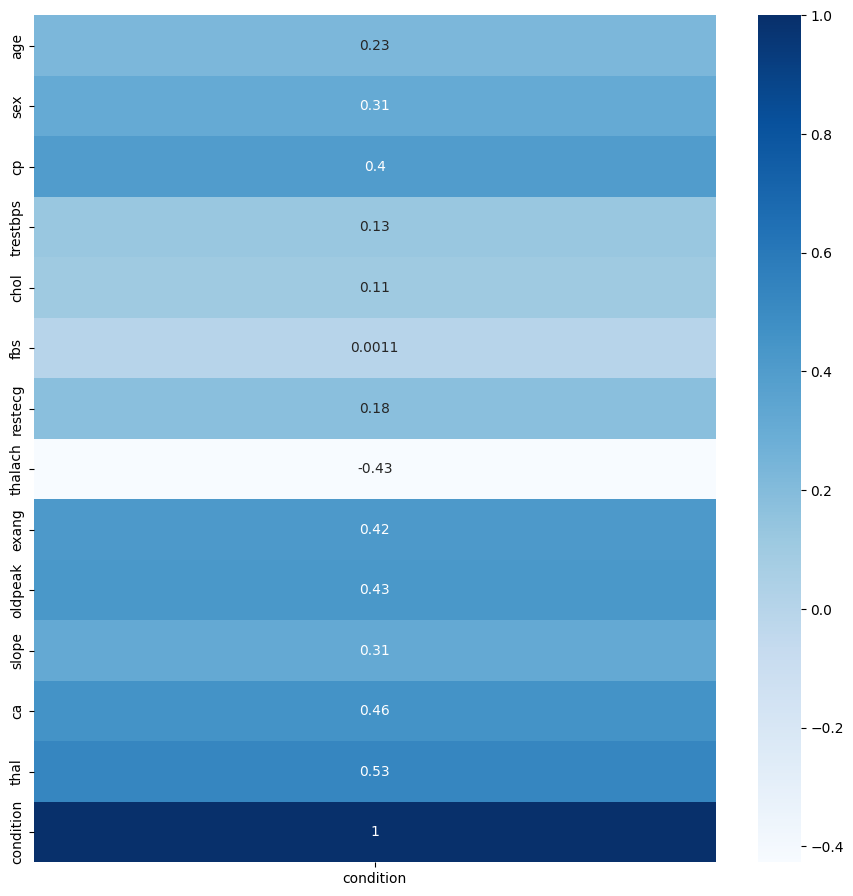

abs corr score: 
age         0.228983
sex         0.312778
cp          0.400245
trestbps    0.125136
chol        0.105708
fbs         0.001061
restecg     0.180018
thalach     0.426779
exang       0.416150
oldpeak     0.428431
slope       0.314566
ca          0.456441
thal        0.530475
Name: condition, dtype: float64


mean 0.30205938379342534


feature selection result: 
sex        0.312778
cp         0.400245
thalach    0.426779
exang      0.416150
oldpeak    0.428431
slope      0.314566
ca         0.456441
thal       0.530475
Name: condition, dtype: float64


In [48]:
print('Pearson Correlation,')
plt.figure(figsize = (11,11))
cor = df.corr().iloc[:,-1:]
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

print('abs corr score: ')
print(abs(cor['condition'][0:-1]))
cor['condition'] = cor['condition'][0:-1]
margin = abs(cor['condition'][0:-1]).mean()

print('\n')

print('mean {0}'.format(margin))

print('\n')

print('feature selection result: ')
fs = abs(cor['condition'][0:-1])[abs(cor['condition']) > margin]
print(fs)

In [51]:
df = df.copy()
ot = {0: "Less chance of HA",1:'More chance of HA'}
df.condition = [ot[item] for item in df.condition]

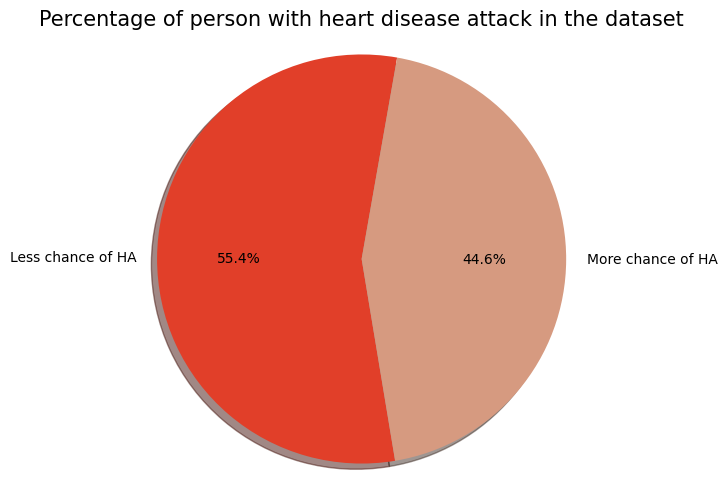

In [52]:
heart=Counter(df['condition'])
classes=[]
count=[]   #list to store no of laels of each class
for i in heart.keys():
    classes.append(i)
    count.append(heart[i])
colors = ["#E13F29", "#D69A80"]

plt.pie(
    count,
    labels = classes,
    shadow = True,
    colors = colors,
    startangle=80,
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of person with heart disease attack in the dataset", fontsize=15)
plt.show()
# fig = px.pie(df, names='output', title='Percentage of person with heart disease present in the dataset')
# fig.show()

# Correlation

<Axes: >

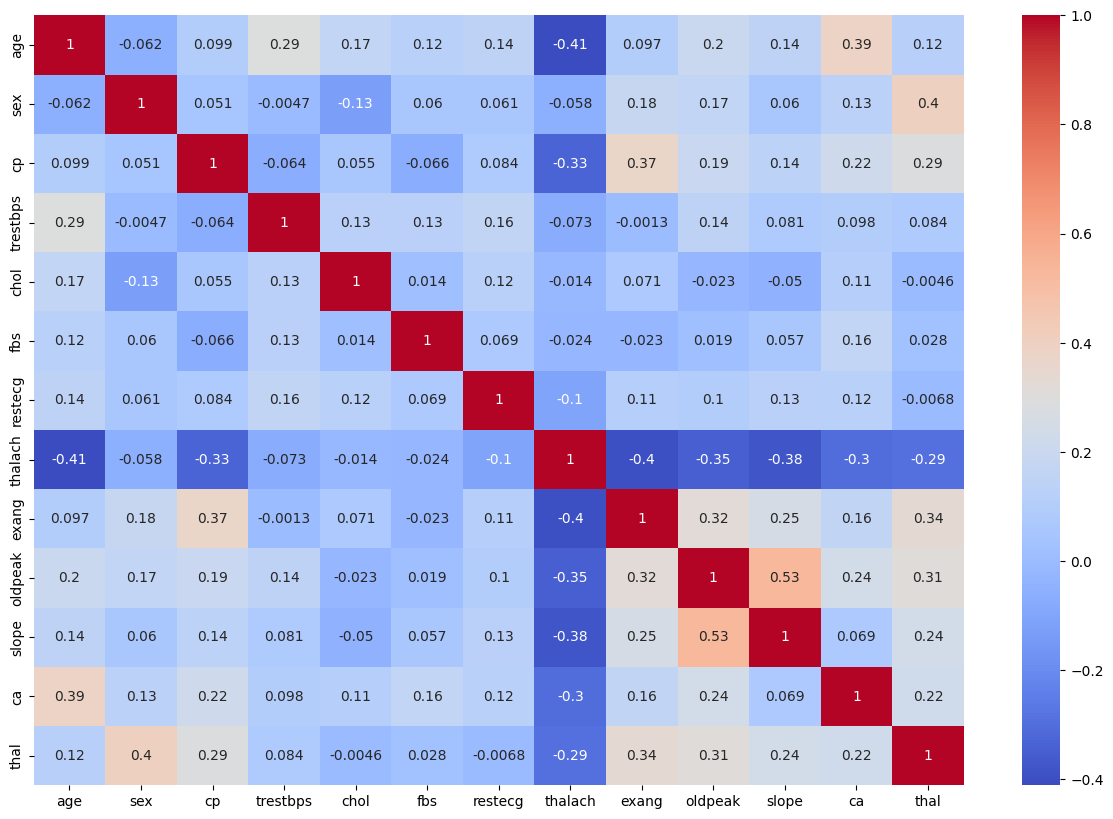

In [56]:
# Display correlation coefficients between variables
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

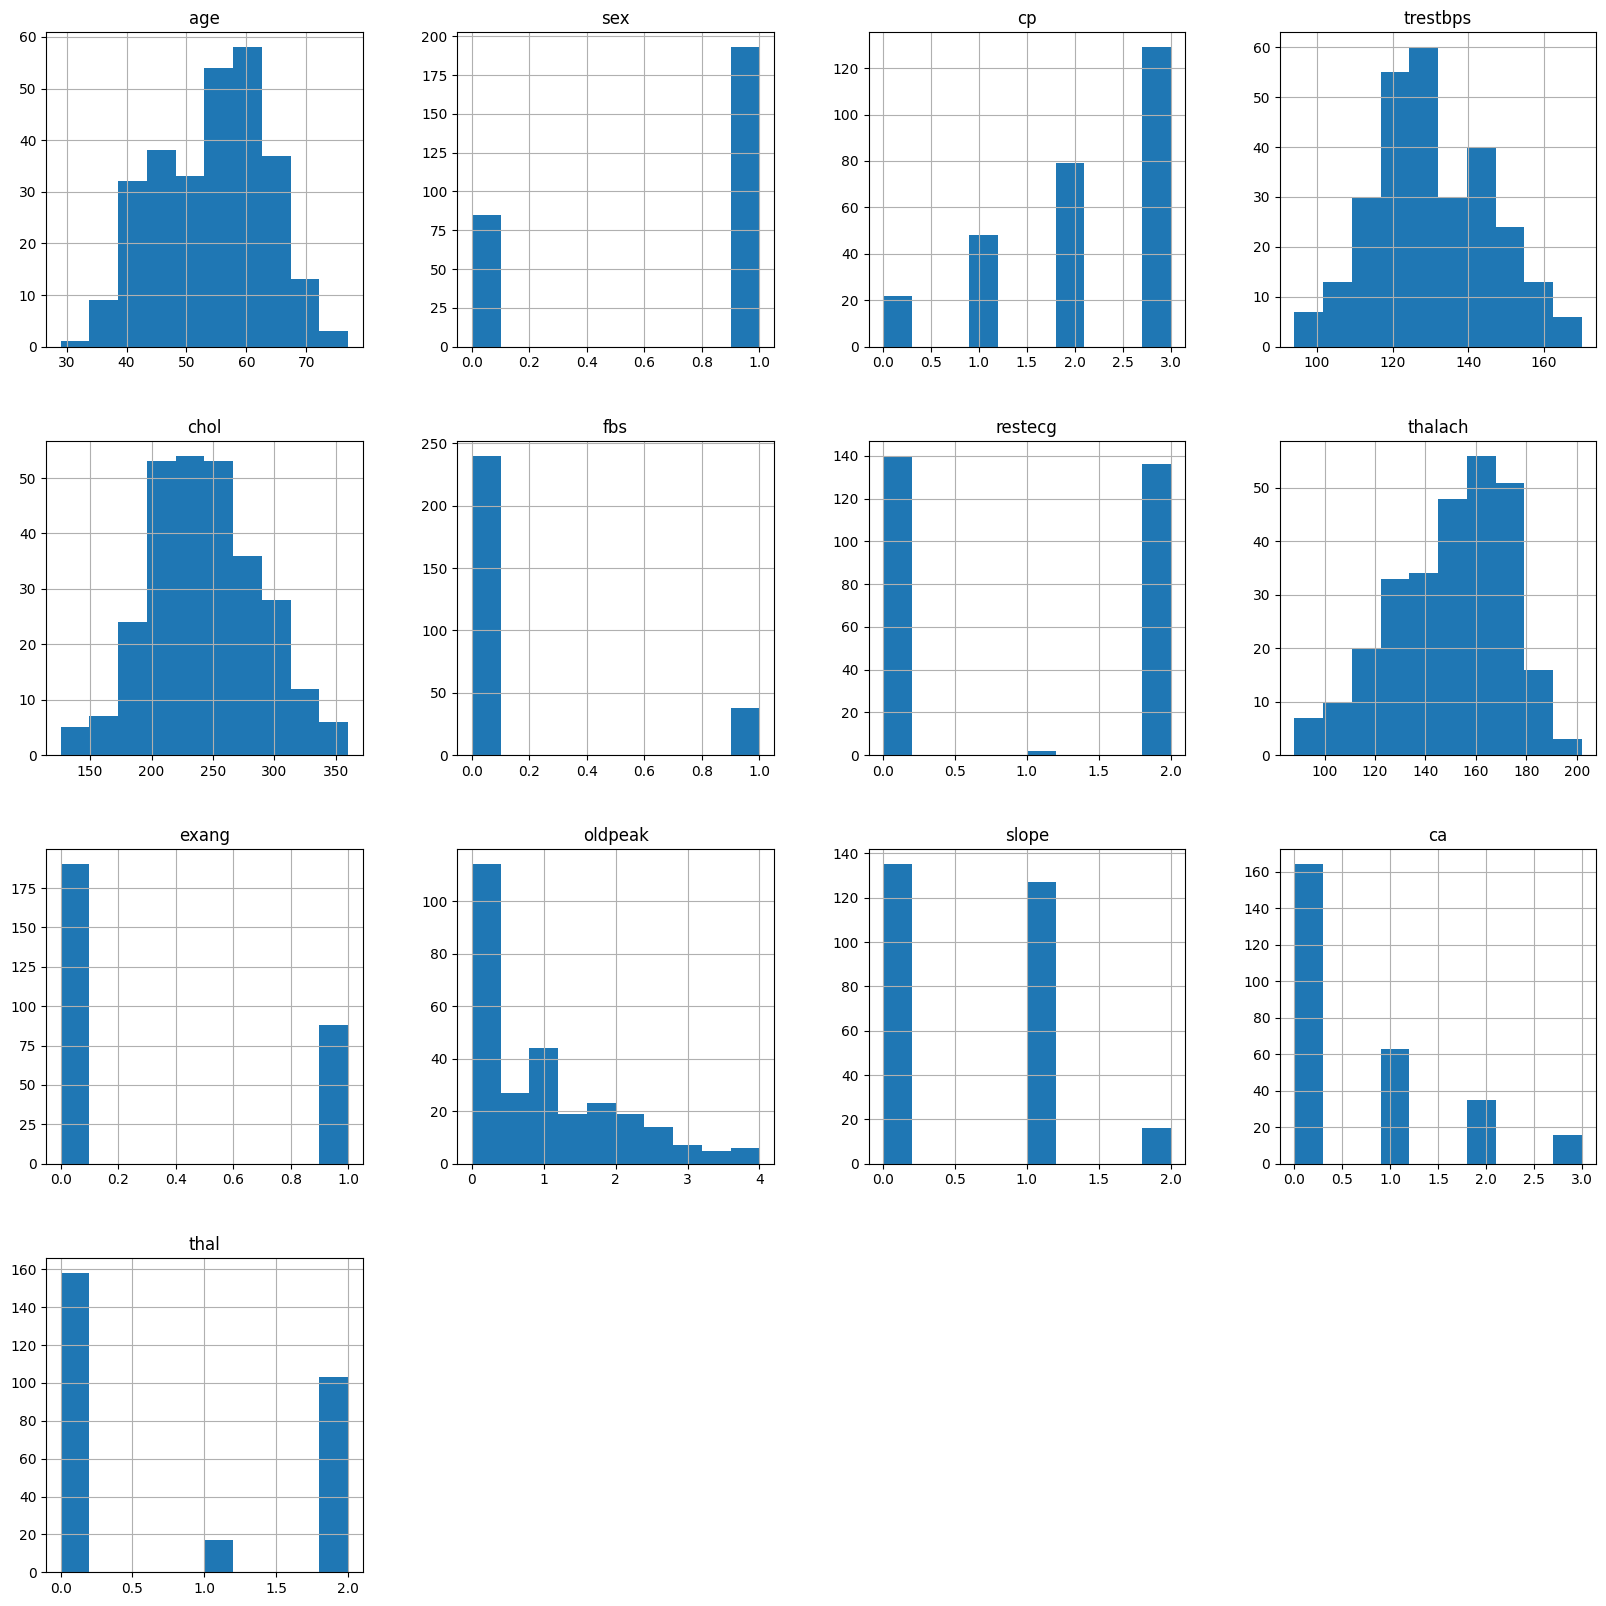

In [59]:
# Display distribution of data
df.hist(figsize=(20,20))
plt.show()

Text(0.5, 1.0, 'Prevalence of Heart attack by cp')

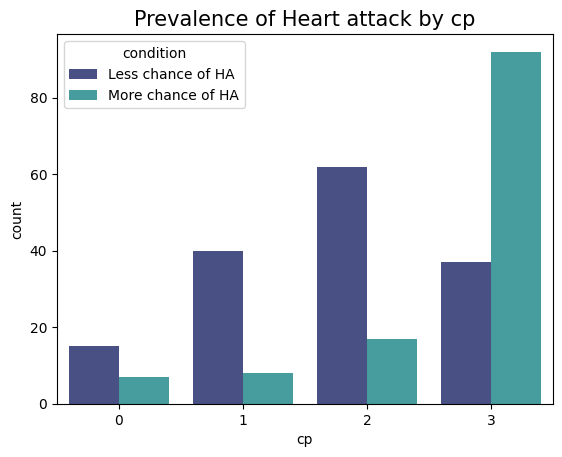

In [63]:
# Plot prevalence of heart attack by cp
sns.countplot(data=df,hue=df['condition'],x=df['cp'], palette="mako")
plt.title('Prevalence of Heart attack by cp',fontsize=15)

Text(0.5, 1.0, 'Prevalence of Heart attack by Sex')

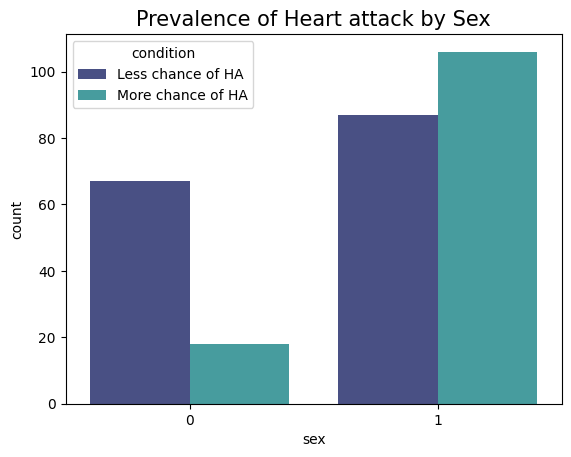

In [65]:
# Plot prevalence of heart attack by sex
sns.countplot(data=df,hue=df['condition'],x=df['sex'], palette="mako")
plt.title('Prevalence of Heart attack by Sex',fontsize=15)

<Axes: xlabel='thalach', ylabel='chol'>

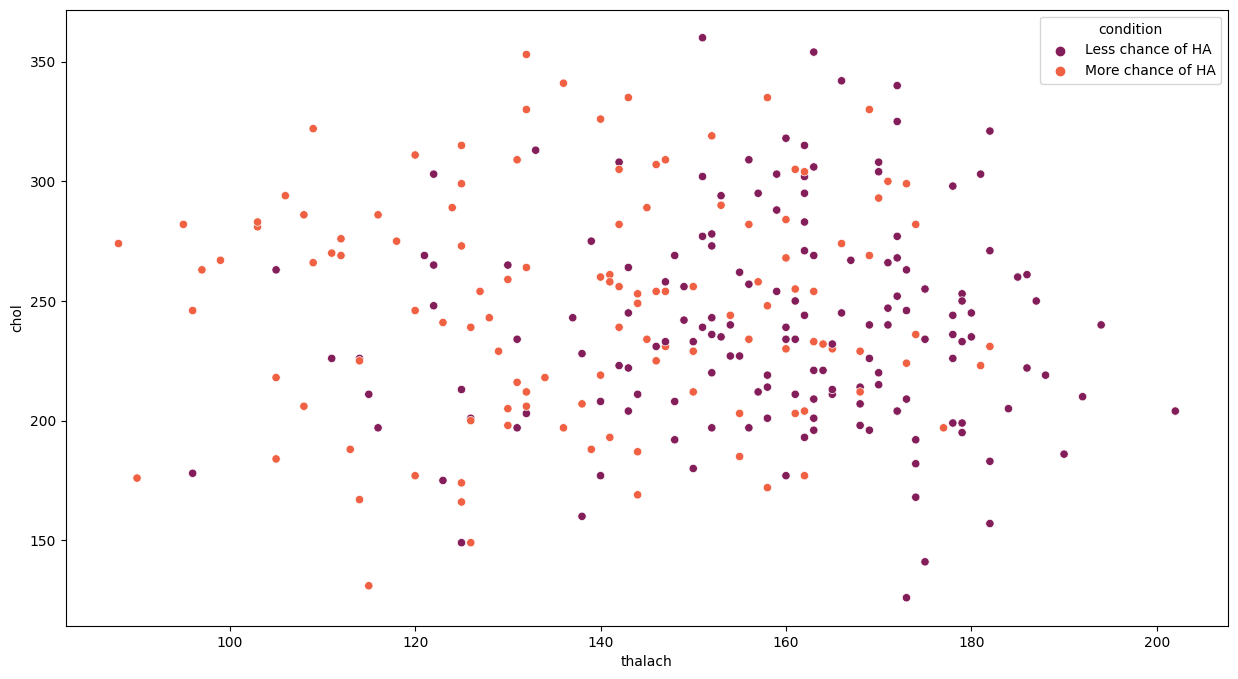

In [70]:
# Plot distribution of chol and thalachh
plt.figure(figsize = (15, 8))
sns.scatterplot(data=df,x='thalach',y='chol' ,hue='condition', palette="rocket")

<Axes: xlabel='age', ylabel='chol'>

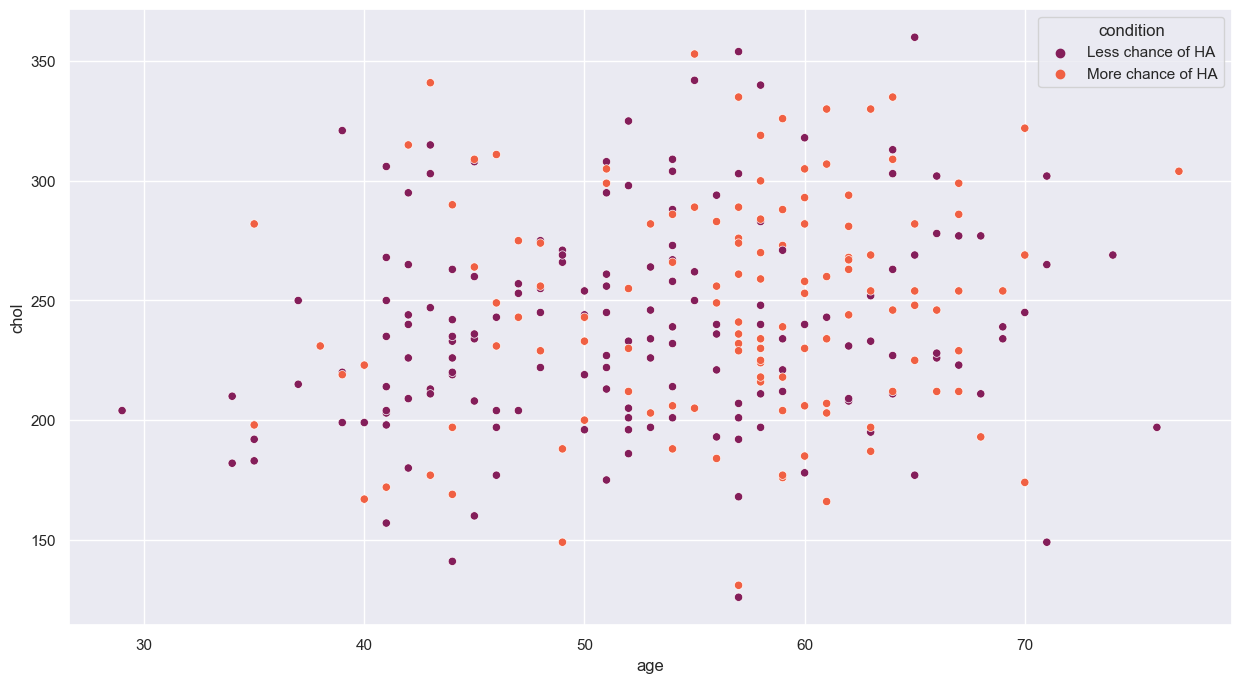

In [74]:
# Plot distribution of chol and age
plt.figure(figsize = (15, 8))
sns.scatterplot(data=df,x='age',y='chol' ,hue='condition', palette="rocket")

In [75]:
from joblib import dump, load

In [76]:
dump(model,'hearthealth.joblib')

['hearthealth.joblib']